 mu_a                 mu_b 
0.3408948405300664 0.13588107924843404
0.29876674464386466 0.22345515246653685
0.2835511597385858 0.2537376966819284
0.275749542198734 0.26381871859126194
0.2723566878015048 0.2675739937570518
0.270953307809706 0.2690355484328583
0.2703836115725791 0.2696145965702822
0.2701540432328451 0.26984566863655
0.2700618059272069 0.2699381477411506
0.27002478974034533 0.26997520280948145


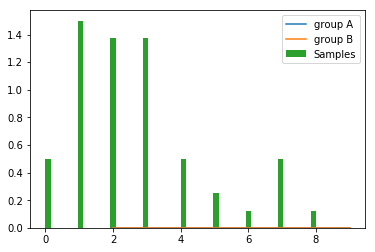

In [31]:
from __future__ import division
import numpy as np
from scipy.stats import bernoulli, binom
import matplotlib.pyplot as plt
#np.random.seed(101) # set random seed for reproducibility
mua_true=4 # we are trying to estimate this from the data
mub_true=7 # we are trying to estimate this from the data
fa=binom(mua_true,1) # distribution for group A
fb=binom(mub_true,1) # distribution for group B
fz=bernoulli(0.5) # each group equally likely 
M=10
def sample(n=10):
    'simulate picking from each group n times'
    tmp=fz.rvs(n) # choose n of the coins, A or B
    return tmp*(fb.rvs(n))+(1-tmp)*fa.rvs(n) # flip it n times

xs =  np.array([7, 7, 1, 3, 2, 1, 5, 1, 4, 0, 2, 3, 3, 1, 2, 2, 3, 1, 4, 0, 8, 3, 5, 3, 0, 0, 7, 1, 1, 3, 1, 3, 2, 4, 1, 6, 2, 2, 4, 1, 3, 1, 1, 2, 7, 3, 3, 2, 2, 2])

#a quick look at the density functions of each group and a histogram of the samples
f,ax = plt.subplots()
x = np.linspace(mua_true-2,mub_true+2,100)
ax.plot(x,fa.pmf(x),label='group A')
ax.plot(x,fb.pmf(x),label='group B')
ax.hist(xs,bins=50, normed=1,label='Samples');
ax.legend(loc=0);

import sympy
from sympy.abc import x, z
from sympy import stats

mu_a,mu_b = sympy.symbols('mu_a,mu_b')
na=stats.Normal( 'x', mu_a,1)
nb=stats.Normal( 'x', mu_b,1)

L=(stats.density(na)(x)+stats.density(nb)(x))/2 # incomplete likelihood function 

def ez(x,mu_a,mu_b): # expected value of hidden variable
  return norm(mu_a).pdf(x)/(norm(mu_a).pdf(x)+ norm(mu_b).pdf(x))



out=[];lout=[] # containers for outputs

Lf=sympy.lambdify((x,mu_a,mu_b), sympy.log(abs(L)),'numpy') # convert to numpy function from sympy

mu_a_n=2 # initial point
mu_b_n=1 # initial point
niter=10 #
print(' mu_a                 mu_b ')
for i in range(niter):
    tau=ez(xs,mu_a_n,mu_b_n) # expected value of z-variable
    lout.append( sum(Lf(xs,mu_a_n,mu_b_n))) # track incomplete likelihood value (should be monotone)
    out.append((mu_a_n,mu_b_n))          # keep track of (pa,pb) steps
    mu_a_n=(sum(tau*xs)/(M*sum(tau)))    # new maximum  likelihood estimate of pa
    mu_b_n=(sum((1-tau)*xs)/(M*sum(1-tau))) 
  
    print(mu_a_n, mu_b_n)